In [1]:
import pandas as pd

df = pd.read_csv('combined_data_simulink.csv')
df.rename(columns={'Soc': 'Actual Soc'}, inplace=True)
print(df)
df.to_csv('combined_data_simulink.csv', index=False)

       Actual Soc   Voltage   Current  Temperature     Speed  AvgVoltage  \
0        1.000000  0.988833  0.313664     0.000000  0.000000    0.988833   
1        0.997976  0.972491  0.666636     0.081748  0.261337    0.981730   
2        0.992862  0.953467  0.900673     0.167689  0.441106    0.972231   
3        0.985845  0.940777  1.000000     0.252835  0.608890    0.963681   
4        0.978965  0.941716  0.878823     0.330001  0.762355    0.957913   
...           ...       ...       ...          ...       ...         ...   
43995    0.000000  0.009658  0.472979     0.945679  0.621603    0.009658   
43996    0.000000  0.009658  0.472979     0.949593  0.805405    0.009658   
43997    0.000000  0.009658  0.472979     0.950542  0.816038    0.009658   
43998    0.000000  0.009658  0.472979     0.952146  0.771148    0.009658   
43999    0.000000  0.009658  0.472979     0.953683  0.833693    0.009658   

       AvgCurrent  AvgSpeed  
0        0.313664  0.000000  
1        0.506703  0.131548

In [ ]:
# To find the best features for accurately predicting the 'Actual Soc', you can perform feature selection and use a suitable machine learning algorithm for regression tasks. Here's a step-by-step guide:

# Step 1: Prepare the Data
# Make sure your DataFrame contains the columns 'Actual Soc', 'Voltage', 'Current', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', and 'AvgSpeed'. Split the data into features (X) and the target variable 'Actual Soc' (y).

In [2]:
import pandas as pd

X = df[['Voltage', 'Current', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

In [ ]:
# Step 2: Feature Selection
# You can use various feature selection techniques to identify the most relevant features. One popular method is using feature importance from tree-based models like Random Forest.

In [3]:
from sklearn.ensemble import RandomForestRegressor
# Create a RandomForestRegressor model
rf = RandomForestRegressor()
# Fit the model to the data
rf.fit(X, y)
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
# Display the feature importances
print(feature_importances)


AvgVoltage     0.655865
Voltage        0.250535
AvgCurrent     0.023749
Temperature    0.022746
AvgSpeed       0.019518
Speed          0.014726
Current        0.012860
dtype: float64


In [ ]:
# Step 3: Choose a Machine Learning Algorithm
# Based on your data and the insights from feature selection, you can choose a suitable regression algorithm. Common choices include Linear Regression, Decision Tree Regression, Support Vector Regression (SVR), etc.

In [4]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficient of determination (R-squared)
r_squared = model.score(X, y)

# Display the R-squared value
print("R-squared:", r_squared)


R-squared: 0.7235147973530967


In [ ]:
# Step 4: Evaluate the Model
# To evaluate the model's performance, you can use metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) on a test dataset.

In [6]:
from sklearn.metrics import mean_squared_error

# Assuming you have a test dataset: X_test, y_test
y_pred = model.predict(X)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Display the Mean Squared Error
print("Mean Squared Error:", mse)


Mean Squared Error: 0.02937699763045596


Selected Features (Univariate Feature Selection): Index(['Voltage', 'Current', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed'], dtype='object')
Selected Features (Random Forest Feature Importance): Index(['AvgVoltage', 'Voltage', 'AvgCurrent', 'Temperature', 'AvgSpeed'], dtype='object')
Selected Features (RFE with Random Forest): Index(['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed'], dtype='object')


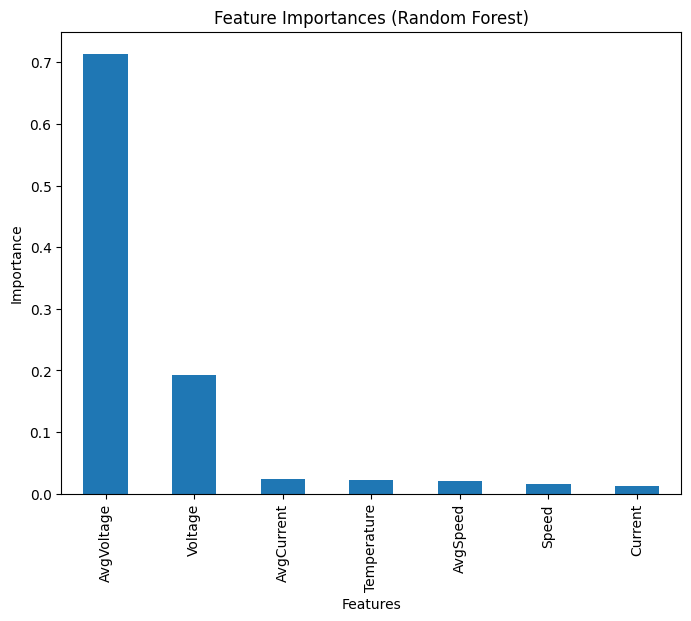

In [7]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Current', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Univariate Feature Selection
# Select the top 5 features based on f_regression score
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features (Univariate Feature Selection):", selected_features)

# Feature Importance from Tree-Based Model (Random Forest)
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features_rf = feature_importances.head(k).index
print("Selected Features (Random Forest Feature Importance):", selected_features_rf)

# Recursive Feature Elimination (RFE) with Random Forest
from sklearn.feature_selection import RFE

rfe_rf = RFE(estimator=rf_model, n_features_to_select=k, step=1)
rfe_rf.fit(X, y)
selected_features_rfe_rf = X.columns[rfe_rf.support_]
print("Selected Features (RFE with Random Forest):", selected_features_rfe_rf)

# Plot Feature Importances from Random Forest
plt.figure(figsize=(8, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Current', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Model Score (R-squared)
model_score = rf_model.score(X_test, y_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the Model Score and RMSE
print("Model Score (R-squared):", model_score)
print("Root Mean Squared Error (RMSE):", rmse)


Model Score (R-squared): 0.9094868355350012
Root Mean Squared Error (RMSE): 0.0985550426017749


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Model Score (R-squared)
model_score = rf_model.score(X_test, y_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the Model Score and RMSE
print("Model Score (R-squared):", model_score)
print("Root Mean Squared Error (RMSE):", rmse)


Model Score (R-squared): 0.9103277829514316
Root Mean Squared Error (RMSE): 0.09809614242588473


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Model Score (R-squared)
model_score = rf_model.score(X_test, y_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the Model Score and RMSE
print("Model Score (R-squared):", model_score)
print("Root Mean Squared Error (RMSE):", rmse)


Model Score (R-squared): 0.9071088366551955
Root Mean Squared Error (RMSE): 0.09984128837525821


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Model Score (R-squared)
model_score = rf_model.score(X_test, y_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the Model Score and RMSE
print("Model Score (R-squared):", model_score)
print("Root Mean Squared Error (RMSE):", rmse)


Model Score (R-squared): 0.8966298136134588
Root Mean Squared Error (RMSE): 0.10532237052080476


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'AvgVoltage', 'AvgCurrent']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Model Score (R-squared)
model_score = rf_model.score(X_test, y_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the Model Score and RMSE
print("Model Score (R-squared):", model_score)
print("Root Mean Squared Error (RMSE):", rmse)


Model Score (R-squared): 0.8733627067301482
Root Mean Squared Error (RMSE): 0.11657456011617127


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'AvgVoltage']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Model Score (R-squared)
model_score = rf_model.score(X_test, y_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the Model Score and RMSE
print("Model Score (R-squared):", model_score)
print("Root Mean Squared Error (RMSE):", rmse)


Model Score (R-squared): 0.8531449386622872
Root Mean Squared Error (RMSE): 0.12553575393031374


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is the DataFrame containing the dataset
X = df[['AvgVoltage']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Model Score (R-squared)
model_score = rf_model.score(X_test, y_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the Model Score and RMSE
print("Model Score (R-squared):", model_score)
print("Root Mean Squared Error (RMSE):", rmse)


Model Score (R-squared): 0.8037235655626704
Root Mean Squared Error (RMSE): 0.1451299533446089


In [ ]:
# ------------------------------------------

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Current', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Regression
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Neural Network Regression (Deep Learning)
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

print("Model Performance:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")
evaluate_model(y_test, y_pred_lgb, "LightGBM Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network Regression")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 7
[LightGBM] [Info] Start training from score 0.276517


c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 2ms/step
Model Performance:
Linear Regression - MSE: 0.0291, R-squared: 0.7286
Decision Tree Regression - MSE: 0.0195, R-squared: 0.8183
Random Forest Regression - MSE: 0.0097, R-squared: 0.9092
SVR - MSE: 0.0180, R-squared: 0.8318
XGBoost Regression - MSE: 0.0110, R-squared: 0.8976
LightGBM Regression - MSE: 0.0107, R-squared: 0.9001
Neural Network Regression - MSE: 0.0126, R-squared: 0.8829


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage','Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Regression
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Neural Network Regression (Deep Learning)
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

print("Model Performance:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")
evaluate_model(y_test, y_pred_lgb, "LightGBM Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network Regression")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 6
[LightGBM] [Info] Start training from score 0.276517


c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 2ms/step
Model Performance:
Linear Regression - MSE: 0.0291, R-squared: 0.7285
Decision Tree Regression - MSE: 0.0182, R-squared: 0.8301
Random Forest Regression - MSE: 0.0097, R-squared: 0.9092
SVR - MSE: 0.0190, R-squared: 0.8228
XGBoost Regression - MSE: 0.0111, R-squared: 0.8966
LightGBM Regression - MSE: 0.0107, R-squared: 0.9003
Neural Network Regression - MSE: 0.0138, R-squared: 0.8714


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Regression
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Neural Network Regression (Deep Learning)
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

print("Model Performance:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")
evaluate_model(y_test, y_pred_lgb, "LightGBM Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network Regression")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 5
[LightGBM] [Info] Start training from score 0.276517


c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 2ms/step
Model Performance:
Linear Regression - MSE: 0.0291, R-squared: 0.7286
Decision Tree Regression - MSE: 0.0190, R-squared: 0.8229
Random Forest Regression - MSE: 0.0098, R-squared: 0.9082
SVR - MSE: 0.0195, R-squared: 0.8180
XGBoost Regression - MSE: 0.0113, R-squared: 0.8945
LightGBM Regression - MSE: 0.0108, R-squared: 0.8998
Neural Network Regression - MSE: 0.0132, R-squared: 0.8774


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Regression
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Neural Network Regression (Deep Learning)
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

print("Model Performance:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")
evaluate_model(y_test, y_pred_lgb, "LightGBM Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network Regression")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 4
[LightGBM] [Info] Start training from score 0.276517


c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 2ms/step
Model Performance:
Linear Regression - MSE: 0.0293, R-squared: 0.7269
Decision Tree Regression - MSE: 0.0213, R-squared: 0.8019
Random Forest Regression - MSE: 0.0112, R-squared: 0.8958
SVR - MSE: 0.0209, R-squared: 0.8054
XGBoost Regression - MSE: 0.0122, R-squared: 0.8866
LightGBM Regression - MSE: 0.0114, R-squared: 0.8937
Neural Network Regression - MSE: 0.0146, R-squared: 0.8636


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'AvgVoltage', 'AvgCurrent']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Regression
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Neural Network Regression (Deep Learning)
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

print("Model Performance:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")
evaluate_model(y_test, y_pred_lgb, "LightGBM Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network Regression")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 3
[LightGBM] [Info] Start training from score 0.276517


c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 2ms/step
Model Performance:
Linear Regression - MSE: 0.0295, R-squared: 0.7251
Decision Tree Regression - MSE: 0.0244, R-squared: 0.7726
Random Forest Regression - MSE: 0.0135, R-squared: 0.8746
SVR - MSE: 0.0189, R-squared: 0.8236
XGBoost Regression - MSE: 0.0133, R-squared: 0.8759
LightGBM Regression - MSE: 0.0128, R-squared: 0.8803
Neural Network Regression - MSE: 0.0146, R-squared: 0.8644


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage','AvgVoltage']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Regression
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Neural Network Regression (Deep Learning)
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

print("Model Performance:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")
evaluate_model(y_test, y_pred_lgb, "LightGBM Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network Regression")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 2
[LightGBM] [Info] Start training from score 0.276517


c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 2ms/step
Model Performance:
Linear Regression - MSE: 0.0295, R-squared: 0.7249
Decision Tree Regression - MSE: 0.0265, R-squared: 0.7529
Random Forest Regression - MSE: 0.0157, R-squared: 0.8537
SVR - MSE: 0.0185, R-squared: 0.8273
XGBoost Regression - MSE: 0.0145, R-squared: 0.8650
LightGBM Regression - MSE: 0.0137, R-squared: 0.8728
Neural Network Regression - MSE: 0.0150, R-squared: 0.8600


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming 'df' is the DataFrame containing the dataset
X = df[['AvgVoltage']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Regression
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Neural Network Regression (Deep Learning)
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

print("Model Performance:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")
evaluate_model(y_test, y_pred_lgb, "LightGBM Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network Regression")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 1
[LightGBM] [Info] Start training from score 0.276517


c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 2ms/step
Model Performance:
Linear Regression - MSE: 0.0296, R-squared: 0.7242
Decision Tree Regression - MSE: 0.0285, R-squared: 0.7341
Random Forest Regression - MSE: 0.0210, R-squared: 0.8042
SVR - MSE: 0.0216, R-squared: 0.7988
XGBoost Regression - MSE: 0.0157, R-squared: 0.8536
LightGBM Regression - MSE: 0.0148, R-squared: 0.8625
Neural Network Regression - MSE: 0.0158, R-squared: 0.8529


In [ ]:
#--------------------xxxxxxxxxxxxx-------------------

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming 'df' is the DataFrame containing the dataset
# X = df[['Voltage', 'Speed', 'Temperature', 'AvgVoltage', 'AvgSpeed']]
X=df[['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Regression
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Neural Network Regression (Deep Learning)
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

print("Model Performance:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")
evaluate_model(y_test, y_pred_lgb, "LightGBM Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network Regression")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 5
[LightGBM] [Info] Start training from score 0.276517


c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 2ms/step
Model Performance:
Linear Regression - MSE: 0.0291, R-squared: 0.7286
Decision Tree Regression - MSE: 0.0189, R-squared: 0.8236
Random Forest Regression - MSE: 0.0099, R-squared: 0.9074
SVR - MSE: 0.0195, R-squared: 0.8180
XGBoost Regression - MSE: 0.0113, R-squared: 0.8945
LightGBM Regression - MSE: 0.0108, R-squared: 0.8998
Neural Network Regression - MSE: 0.0131, R-squared: 0.8775


In [20]:
# import numpy as np
# from sklearn.model_selection import cross_val_score

# # Assuming 'df' is the DataFrame containing the dataset
# X = df[['Voltage', 'Current', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
# y = df['Actual Soc']

# # Linear Regression with Cross-Validation
# linear_model = LinearRegression()
# linear_scores = cross_val_score(linear_model, X, y, scoring='neg_mean_squared_error', cv=5)
# linear_rmse_scores = np.sqrt(-linear_scores)

# # Decision Tree Regression with Cross-Validation
# decision_tree_model = DecisionTreeRegressor()
# dt_scores = cross_val_score(decision_tree_model, X, y, scoring='neg_mean_squared_error', cv=5)
# dt_rmse_scores = np.sqrt(-dt_scores)

# # Random Forest Regression with Cross-Validation
# random_forest_model = RandomForestRegressor()
# rf_scores = cross_val_score(random_forest_model, X, y, scoring='neg_mean_squared_error', cv=5)
# rf_rmse_scores = np.sqrt(-rf_scores)

# # Support Vector Regression (SVR) with Cross-Validation
# svr_model = SVR()
# svr_scores = cross_val_score(svr_model, X, y, scoring='neg_mean_squared_error', cv=5)
# svr_rmse_scores = np.sqrt(-svr_scores)

# # XGBoost Regression with Cross-Validation
# xgb_model = xgb.XGBRegressor()
# xgb_scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
# xgb_rmse_scores = np.sqrt(-xgb_scores)

# # LightGBM Regression with Cross-Validation
# lgb_model = lgb.LGBMRegressor()
# lgb_scores = cross_val_score(lgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
# lgb_rmse_scores = np.sqrt(-lgb_scores)

# # Neural Network Regression (Deep Learning) with Cross-Validation
# def create_nn_model():
#     model = Sequential()
#     model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='linear'))
#     model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
#     return model

# nn_model = create_nn_model()
# nn_scores = cross_val_score(nn_model, X, y, scoring='neg_mean_squared_error', cv=5)
# nn_rmse_scores = np.sqrt(-nn_scores)

# # Function to display RMSE scores
# def display_rmse_scores(model_name, rmse_scores):
#     print(f"{model_name} - Cross-Validation RMSE: {rmse_scores}")
#     print(f"{model_name} - Mean RMSE: {np.mean(rmse_scores):.4f}, Std Deviation: {np.std(rmse_scores):.4f}")

# # Display the RMSE scores for each model
# display_rmse_scores("Linear Regression", linear_rmse_scores)
# display_rmse_scores("Decision Tree Regression", dt_rmse_scores)
# display_rmse_scores("Random Forest Regression", rf_rmse_scores)
# display_rmse_scores("SVR", svr_rmse_scores)
# display_rmse_scores("XGBoost Regression", xgb_rmse_scores)
# display_rmse_scores("LightGBM Regression", lgb_rmse_scores)
# display_rmse_scores("Neural Network Regression", nn_rmse_scores)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 7
[LightGBM] [Info] Start training from score 0.287349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 7
[LightGBM] [Info] Start training from score 0.278610
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 7
[LightGBM] [Info] Sta

c:\python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000002B4A86E5E90>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
# import numpy as np
# from sklearn.model_selection import cross_val_score

# # Assuming 'df' is the DataFrame containing the dataset
# X = df[['Voltage', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
# y = df['Actual Soc']

# # Linear Regression with Cross-Validation
# linear_model = LinearRegression()
# linear_scores = cross_val_score(linear_model, X, y, scoring='neg_mean_squared_error', cv=5)
# linear_rmse_scores = np.sqrt(-linear_scores)

# # Decision Tree Regression with Cross-Validation
# decision_tree_model = DecisionTreeRegressor()
# dt_scores = cross_val_score(decision_tree_model, X, y, scoring='neg_mean_squared_error', cv=5)
# dt_rmse_scores = np.sqrt(-dt_scores)

# # Random Forest Regression with Cross-Validation
# random_forest_model = RandomForestRegressor()
# rf_scores = cross_val_score(random_forest_model, X, y, scoring='neg_mean_squared_error', cv=5)
# rf_rmse_scores = np.sqrt(-rf_scores)

# # Support Vector Regression (SVR) with Cross-Validation
# svr_model = SVR()
# svr_scores = cross_val_score(svr_model, X, y, scoring='neg_mean_squared_error', cv=5)
# svr_rmse_scores = np.sqrt(-svr_scores)

# # XGBoost Regression with Cross-Validation
# xgb_model = xgb.XGBRegressor()
# xgb_scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
# xgb_rmse_scores = np.sqrt(-xgb_scores)

# # LightGBM Regression with Cross-Validation
# lgb_model = lgb.LGBMRegressor()
# lgb_scores = cross_val_score(lgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
# lgb_rmse_scores = np.sqrt(-lgb_scores)

# # Neural Network Regression (Deep Learning) with Cross-Validation
# def create_nn_model():
#     model = Sequential()
#     model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='linear'))
#     model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
#     return model

# nn_model = create_nn_model()
# nn_scores = cross_val_score(nn_model, X, y, scoring='neg_mean_squared_error', cv=5)
# nn_rmse_scores = np.sqrt(-nn_scores)

# # Function to display RMSE scores
# def display_rmse_scores(model_name, rmse_scores):
#     print(f"{model_name} - Cross-Validation RMSE: {rmse_scores}")
#     print(f"{model_name} - Mean RMSE: {np.mean(rmse_scores):.4f}, Std Deviation: {np.std(rmse_scores):.4f}")

# # Display the RMSE scores for each model
# display_rmse_scores("Linear Regression", linear_rmse_scores)
# display_rmse_scores("Decision Tree Regression", dt_rmse_scores)
# display_rmse_scores("Random Forest Regression", rf_rmse_scores)
# display_rmse_scores("SVR", svr_rmse_scores)
# display_rmse_scores("XGBoost Regression", xgb_rmse_scores)
# display_rmse_scores("LightGBM Regression", lgb_rmse_scores)
# display_rmse_scores("Neural Network Regression", nn_rmse_scores)
# import numpy as np
# from sklearn.model_selection import cross_val_score

# # Assuming 'df' is the DataFrame containing the dataset
# X = df[['Voltage', 'Current', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
# y = df['Actual Soc']

# # Linear Regression with Cross-Validation
# linear_model = LinearRegression()
# linear_scores = cross_val_score(linear_model, X, y, scoring='neg_mean_squared_error', cv=5)
# linear_rmse_scores = np.sqrt(-linear_scores)

# # Decision Tree Regression with Cross-Validation
# decision_tree_model = DecisionTreeRegressor()
# dt_scores = cross_val_score(decision_tree_model, X, y, scoring='neg_mean_squared_error', cv=5)
# dt_rmse_scores = np.sqrt(-dt_scores)

# # Random Forest Regression with Cross-Validation
# random_forest_model = RandomForestRegressor()
# rf_scores = cross_val_score(random_forest_model, X, y, scoring='neg_mean_squared_error', cv=5)
# rf_rmse_scores = np.sqrt(-rf_scores)

# # Support Vector Regression (SVR) with Cross-Validation
# svr_model = SVR()
# svr_scores = cross_val_score(svr_model, X, y, scoring='neg_mean_squared_error', cv=5)
# svr_rmse_scores = np.sqrt(-svr_scores)

# # XGBoost Regression with Cross-Validation
# xgb_model = xgb.XGBRegressor()
# xgb_scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
# xgb_rmse_scores = np.sqrt(-xgb_scores)

# # LightGBM Regression with Cross-Validation
# lgb_model = lgb.LGBMRegressor()
# lgb_scores = cross_val_score(lgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
# lgb_rmse_scores = np.sqrt(-lgb_scores)

# # Neural Network Regression (Deep Learning) with Cross-Validation
# def create_nn_model():
#     model = Sequential()
#     model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='linear'))
#     model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
#     return model

# nn_model = create_nn_model()
# nn_scores = cross_val_score(nn_model, X, y, scoring='neg_mean_squared_error', cv=5)
# nn_rmse_scores = np.sqrt(-nn_scores)

# # Function to display RMSE scores
# def display_rmse_scores(model_name, rmse_scores):
#     print(f"{model_name} - Cross-Validation RMSE: {rmse_scores}")
#     print(f"{model_name} - Mean RMSE: {np.mean(rmse_scores):.4f}, Std Deviation: {np.std(rmse_scores):.4f}")

# # Display the RMSE scores for each model
# display_rmse_scores("Linear Regression", linear_rmse_scores)
# display_rmse_scores("Decision Tree Regression", dt_rmse_scores)
# display_rmse_scores("Random Forest Regression", rf_rmse_scores)
# display_rmse_scores("SVR", svr_rmse_scores)
# display_rmse_scores("XGBoost Regression", xgb_rmse_scores)
# display_rmse_scores("LightGBM Regression", lgb_rmse_scores)
# display_rmse_scores("Neural Network Regression", nn_rmse_scores)


In [1]:
#features best selected: [['Voltage','Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
#we'll apply different models and predict the Soc then analyze them visually

In [11]:
import pandas as pd
soc_df=pd.read_csv('combined_data_simulink.csv')

In [12]:
soc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Actual Soc   44000 non-null  float64
 1   Voltage      44000 non-null  float64
 2   Current      44000 non-null  float64
 3   Temperature  44000 non-null  float64
 4   Speed        44000 non-null  float64
 5   AvgVoltage   44000 non-null  float64
 6   AvgCurrent   44000 non-null  float64
 7   AvgSpeed     44000 non-null  float64
dtypes: float64(8)
memory usage: 2.7 MB


In [13]:
soc_df.drop(columns='Current',inplace=True)
soc_df.to_csv('updated_soc.csv',index=False)

In [14]:
soc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Actual Soc   44000 non-null  float64
 1   Voltage      44000 non-null  float64
 2   Temperature  44000 non-null  float64
 3   Speed        44000 non-null  float64
 4   AvgVoltage   44000 non-null  float64
 5   AvgCurrent   44000 non-null  float64
 6   AvgSpeed     44000 non-null  float64
dtypes: float64(7)
memory usage: 2.3 MB


In [15]:
###########################  only predicting on the test dataset ---- ignore
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load your DataFrame (soc_df)
# soc_df = pd.read_csv('your_data.csv')

# Define features (X) and the target variable (y)
X = soc_df[['Voltage', 'Temperature', 'Speed', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = soc_df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store results
results = {'Model': [], 'R2 Score': [], 'MSE': []}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
results['Model'].append('Linear Regression')
results['R2 Score'].append(lr_r2)
results['MSE'].append(lr_mse)
soc_df['Linear Regression Predictions'] = np.nan
soc_df.loc[y_test.index, 'Linear Regression Predictions'] = lr_predictions

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
results['Model'].append('Decision Tree Regression')
results['R2 Score'].append(dt_r2)
results['MSE'].append(dt_mse)
soc_df['Decision Tree Predictions'] = np.nan
soc_df.loc[y_test.index, 'Decision Tree Predictions'] = dt_predictions

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
results['Model'].append('Random Forest Regression')
results['R2 Score'].append(rf_r2)
results['MSE'].append(rf_mse)
soc_df['Random Forest Predictions'] = np.nan
soc_df.loc[y_test.index, 'Random Forest Predictions'] = rf_predictions

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_r2 = r2_score(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
results['Model'].append('SVR')
results['R2 Score'].append(svr_r2)
results['MSE'].append(svr_mse)
soc_df['SVR Predictions'] = np.nan
soc_df.loc[y_test.index, 'SVR Predictions'] = svr_predictions

# XGBoost Regression
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
results['Model'].append('XGBoost Regression')
results['R2 Score'].append(xgb_r2)
results['MSE'].append(xgb_mse)
soc_df['XGBoost Predictions'] = np.nan
soc_df.loc[y_test.index, 'XGBoost Predictions'] = xgb_predictions

# LightGBM Regression
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_r2 = r2_score(y_test, lgbm_predictions)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
results['Model'].append('LightGBM Regression')
results['R2 Score'].append(lgbm_r2)
results['MSE'].append(lgbm_mse)
soc_df['LightGBM Predictions'] = np.nan
soc_df.loc[y_test.index, 'LightGBM Predictions'] = lgbm_predictions

# Neural Network Regression
nn_model = MLPRegressor(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_r2 = r2_score(y_test, nn_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)
results['Model'].append('Neural Network Regression')
results['R2 Score'].append(nn_r2)
results['MSE'].append(nn_mse)
soc_df['Neural Network Predictions'] = np.nan
soc_df.loc[y_test.index, 'Neural Network Predictions'] = nn_predictions

# Save results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('regression_results.csv', index=False)

# Save the DataFrame with predictions
soc_df.to_csv('soc_with_predictions.csv', index=False)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 6
[LightGBM] [Info] Start training from score 0.276517


In [1]:
############################### complete dataset prediction -- important
# RFE & RFI FS(SAME FEATURES)
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import joblib

# Load your DataFrame (soc_df)
soc_df = pd.read_csv('RFE_FS_SOC_DATASET.csv')

# Define features (X) and the target variable (y)
X = soc_df[['Voltage', 'Temperature', 'Speed', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = soc_df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store results
results = {'Model': [], 'R2 Score': [], 'MSE': []}

# Models to iterate over
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('SVR', SVR()),
    ('XGBoost Regression', XGBRegressor(random_state=42)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Neural Network Regression', MLPRegressor(random_state=42))
]

# Loop through models
for model_name, model in models:
    model.fit(X_train, y_train)
    model_predictions = model.predict(X_test)
    model_r2 = r2_score(y_test, model_predictions)
    model_mse = mean_squared_error(y_test, model_predictions)
    results['Model'].append(model_name)
    results['R2 Score'].append(model_r2)
    results['MSE'].append(model_mse)
    
    # Save the trained model to a file
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Load the saved model
    loaded_model = joblib.load(f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Make predictions on the original DataFrame
    model_predictions = loaded_model.predict(X)

    # Add the predictions to the original DataFrame
    soc_df[f'{model_name} Predictions'] = model_predictions

# Save results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('RFE_regression_results.csv', index=False)

# Save the DataFrame with predictions
soc_df.to_csv('RFE_soc_with_predictions.csv', index=False)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 6
[LightGBM] [Info] Start training from score 0.276517


In [22]:

import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
input_file = 'combined_data_simulink.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# List of column names to drop
columns_to_drop = ['Temperature']  # Replace with the actual column names you want to drop

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Save the modified DataFrame to a new CSV file or overwrite the original file
output_file = 'UNIVARIATE_FS_SOC_DATASET.csv'  # Replace with the desired output file name
df.to_csv(output_file, index=False)


In [23]:
# Univariate--------------------
############################### complete dataset prediction -- important
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import joblib

# Load your DataFrame (soc_df)
soc_df = pd.read_csv('UNIVARIATE_FS_SOC_DATASET.csv')

# Define features (X) and the target variable (y)
X = soc_df[['Voltage','Current','Speed', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = soc_df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store results
results = {'Model': [], 'R2 Score': [], 'MSE': []}

# Models to iterate over
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('SVR', SVR()),
    ('XGBoost Regression', XGBRegressor(random_state=42)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Neural Network Regression', MLPRegressor(random_state=42))
]

# Loop through models
for model_name, model in models:
    model.fit(X_train, y_train)
    model_predictions = model.predict(X_test)
    model_r2 = r2_score(y_test, model_predictions)
    model_mse = mean_squared_error(y_test, model_predictions)
    results['Model'].append(model_name)
    results['R2 Score'].append(model_r2)
    results['MSE'].append(model_mse)
    
    # Save the trained model to a file
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Load the saved model
    loaded_model = joblib.load(f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Make predictions on the original DataFrame
    model_predictions = loaded_model.predict(X)

    # Add the predictions to the original DataFrame
    soc_df[f'{model_name} Predictions'] = model_predictions

# Save results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('UNIVARIATE_regression_results.csv', index=False)

# Save the DataFrame with predictions
soc_df.to_csv('UNIVARIATE_soc_with_predictions.csv', index=False)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 6
[LightGBM] [Info] Start training from score 0.276517


In [13]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your DataFrame (soc_df)
df = pd.read_csv('combined_data_simulink.csv')

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Current', 'Speed', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Univariate Feature Selection
# Select the top 6 features based on f_regression score
k = 6
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features (Univariate Feature Selection):", selected_features)

# Feature Importance from Tree-Based Model (Random Forest)
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features_rf = feature_importances.head(k).index
print("Selected Features (Random Forest Feature Importance):", selected_features_rf)

# Recursive Feature Elimination (RFE) with Random Forest
from sklearn.feature_selection import RFE

rfe_rf = RFE(estimator=rf_model, n_features_to_select=k, step=1)
rfe_rf.fit(X, y)
selected_features_rfe_rf = X.columns[rfe_rf.support_]
print("Selected Features (RFE with Random Forest):", selected_features_rfe_rf)

# Plot Feature Importances from Random Forest
plt.figure(figsize=(8, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


Selected Features (Univariate Feature Selection): Index(['Voltage', 'Current', 'Speed', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed'], dtype='object')
Selected Features (Random Forest Feature Importance): Index(['AvgVoltage', 'Voltage', 'AvgCurrent', 'Temperature', 'AvgSpeed',
       'Speed'],
      dtype='object')


KeyboardInterrupt: 

Selected Features (Univariate Feature Selection (f_regression)): Index(['Voltage', 'Current', 'Speed', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed'], dtype='object')


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)


Selected Features (Random Forest Feature Importance): Index(['AvgVoltage', 'Voltage', 'AvgCurrent', 'Temperature', 'AvgSpeed'], dtype='object')


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)


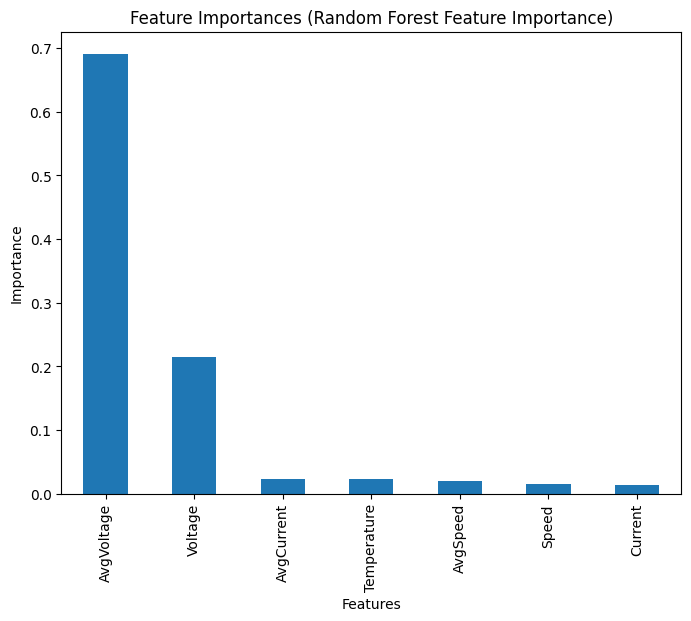

Selected Features (RFE with Random Forest): Index(['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed'], dtype='object')


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)


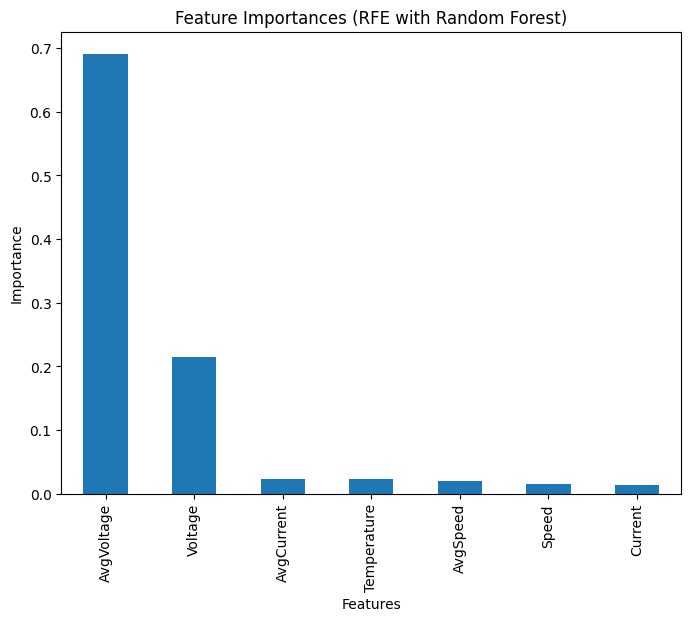

Selected Features (Mutual Information): Index(['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed'], dtype='object')


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)


Selected Features (LASSO Regression): Index(['Voltage', 'Temperature', 'Speed', 'AvgCurrent', 'AvgSpeed'], dtype='object')
Selected Features (RFE with Linear Regression): Index(['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed'], dtype='object')


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)


Selected Features (RFE with SVM): Index(['Voltage', 'Temperature', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed'], dtype='object')


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)


Selected Features (RFECV with Linear Regression): Index(['Voltage', 'Temperature'], dtype='object')
Selected Features (PCA): ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_21604\810033454.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA

# Load your DataFrame (soc_df)
df = pd.read_csv('combined_data_simulink.csv')

# Assuming 'df' is the DataFrame containing the dataset
X = df[['Voltage', 'Current', 'Temperature', 'Speed', 'AvgVoltage', 'AvgCurrent', 'AvgSpeed']]
y = df['Actual Soc']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Method', 'Selected_Features'])

# Define the feature selection methods
methods = [
    ('Univariate Feature Selection (f_regression)', SelectKBest(score_func=f_regression, k=5)),
    ('Random Forest Feature Importance', RandomForestRegressor()),
    ('RFE with Random Forest', RFE(estimator=RandomForestRegressor(), n_features_to_select=5, step=1)),
    ('Mutual Information', SelectKBest(score_func=mutual_info_regression, k=5)),
    ('LASSO Regression', LassoCV()),
    ('RFE with Linear Regression', RFE(estimator=LinearRegression(), n_features_to_select=5, step=1)),
    ('RFE with SVM', RFE(estimator=SVR(kernel="linear"), n_features_to_select=5, step=1)),
    ('RFECV with Linear Regression', RFECV(estimator=LinearRegression())),
    ('PCA', PCA(n_components=5))
]

# Loop through each feature selection method and print selected features
for method_name, method in methods:
    if 'SelectKBest' in method_name:
        method.fit(X, y)
        selected_features = X.columns[method.get_support()]
    elif 'RFE' in method_name or 'RFECV' in method_name:
        method.fit(X, y)  # Train RFE-based methods
        selected_features = X.columns[method.support_]
    elif 'PCA' in method_name:
        method.fit(X)
        selected_features = [f'PC{idx+1}' for idx in range(method.n_components_)]
    elif 'LASSO' in method_name:
        method.fit(X, y)
        selected_features = X.columns[abs(method.coef_) > 0]
    else:
        method.fit(X, y)  # Train the model
        importances = method.feature_importances_ if hasattr(method, 'feature_importances_') else None
        if importances is not None:
            selected_features = X.columns[importances.argsort()[::-1]][:5]
    
    print(f"Selected Features ({method_name}):", selected_features)
    
    # Add the results to the DataFrame
    results_df = results_df.append({'Method': method_name, 'Selected_Features': ', '.join(selected_features)}, ignore_index=True)
    
    if 'Random Forest' in method_name:
        # Plot Feature Importances from Random Forest
        plt.figure(figsize=(8, 6))
        feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
        feature_importances.plot(kind='bar')
        plt.title(f"Feature Importances ({method_name})")
        plt.ylabel("Importance")
        plt.xlabel("Features")
        plt.show()

# Save the results DataFrame to a CSV file
results_df.to_csv('feature_selection_results.csv', index=False)


In [25]:
#LASSO Regression fs---
#"Voltage, Temperature, Speed, AvgCurrent, AvgSpeed"

import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
input_file = 'combined_data_simulink.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# List of column names to drop
columns_to_drop = ['Current','AvgVoltage']  # Replace with the actual column names you want to drop

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Save the modified DataFrame to a new CSV file or overwrite the original file
output_file = 'LASSO_FS_SOC_DATASET.csv'  # Replace with the desired output file name
df.to_csv(output_file, index=False)


In [26]:
# Lasso Regression --------------------
############################### complete dataset prediction -- important
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import joblib

# Load your DataFrame (soc_df)
soc_df = pd.read_csv('LASSO_FS_SOC_DATASET.csv')

# Define features (X) and the target variable (y)
X = soc_df[['Voltage', 'Temperature','Speed', 'AvgCurrent', 'AvgSpeed']]
y = soc_df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store results
results = {'Model': [], 'R2 Score': [], 'MSE': []}

# Models to iterate over
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('SVR', SVR()),
    ('XGBoost Regression', XGBRegressor(random_state=42)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Neural Network Regression', MLPRegressor(random_state=42))
]

# Loop through models
for model_name, model in models:
    model.fit(X_train, y_train)
    model_predictions = model.predict(X_test)
    model_r2 = r2_score(y_test, model_predictions)
    model_mse = mean_squared_error(y_test, model_predictions)
    results['Model'].append(model_name)
    results['R2 Score'].append(model_r2)
    results['MSE'].append(model_mse)
    
    # Save the trained model to a file
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Load the saved model
    loaded_model = joblib.load(f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Make predictions on the original DataFrame
    model_predictions = loaded_model.predict(X)

    # Add the predictions to the original DataFrame
    soc_df[f'{model_name} Predictions'] = model_predictions

# Save results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('LASSO_regression_results.csv', index=False)

# Save the DataFrame with predictions
soc_df.to_csv('LASSO_soc_with_predictions.csv', index=False)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 5
[LightGBM] [Info] Start training from score 0.276517


In [27]:
#RFECV with Linear Regression FS-----
#"Voltage, Temperature"
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
input_file = 'combined_data_simulink.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# List of column names to drop
columns_to_drop = ['AvgVoltage','Current','Speed', 'AvgCurrent', 'AvgSpeed']  # Replace with the actual column names you want to drop

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Save the modified DataFrame to a new CSV file or overwrite the original file
output_file = 'RFECV_FS_SOC_DATASET.csv'  # Replace with the desired output file name
df.to_csv(output_file, index=False)

In [28]:
# #RFECV with Linear Regression --------------------
############################### complete dataset prediction -- important
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import joblib

# Load your DataFrame (soc_df)
soc_df = pd.read_csv('RFECV_FS_SOC_DATASET.csv')

# Define features (X) and the target variable (y)
X = soc_df[['Voltage', 'Temperature']]
y = soc_df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store results
results = {'Model': [], 'R2 Score': [], 'MSE': []}

# Models to iterate over
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('SVR', SVR()),
    ('XGBoost Regression', XGBRegressor(random_state=42)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Neural Network Regression', MLPRegressor(random_state=42))
]

# Loop through models
for model_name, model in models:
    model.fit(X_train, y_train)
    model_predictions = model.predict(X_test)
    model_r2 = r2_score(y_test, model_predictions)
    model_mse = mean_squared_error(y_test, model_predictions)
    results['Model'].append(model_name)
    results['R2 Score'].append(model_r2)
    results['MSE'].append(model_mse)
    
    # Save the trained model to a file
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Load the saved model
    loaded_model = joblib.load(f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Make predictions on the original DataFrame
    model_predictions = loaded_model.predict(X)

    # Add the predictions to the original DataFrame
    soc_df[f'{model_name} Predictions'] = model_predictions

# Save results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('RFECV_regression_results.csv', index=False)

# Save the DataFrame with predictions
soc_df.to_csv('RFECV_soc_with_predictions.csv', index=False)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 2
[LightGBM] [Info] Start training from score 0.276517
